Imports and Data Loading

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import scipy as sp

In [ ]:
df = pd.read_csv('/content/Life Expectancy Data.csv')
df.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df.isna().sum().to_frame()
df.shape

(2938, 22)

In [ ]:
df.info()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
df['Life expectancy '] = df['Life expectancy '].fillna(df['Life expectancy '].mean())
df['Adult Mortality'] = df['Adult Mortality'].fillna(df['Adult Mortality'].mean())
df['Alcohol'] = df['Alcohol'].fillna(df['Alcohol'].mean())
df['Hepatitis B'] = df['Hepatitis B'].fillna(df['Hepatitis B'].mean())
df[' BMI '] = df[' BMI '].fillna(df[' BMI '].mean())
df['Polio'] = df['Polio'].fillna(df['Polio'].mean())
df['Total expenditure'] = df['Total expenditure'].fillna(df['Total expenditure'].mean())
df['Diphtheria '] = df['Diphtheria '].fillna(df['Diphtheria '].mean())
df['GDP'] = df['GDP'].fillna(df['GDP'].mean())
df['Population'] = df['Population'].fillna(df['Population'].mean())
df[' thinness  1-19 years'] = df[' thinness  1-19 years'].fillna(df[' thinness  1-19 years'].mean())
df[' thinness 5-9 years'] = df[' thinness 5-9 years'].fillna(df[' thinness 5-9 years'].mean())
df['Income composition of resources'] = df['Income composition of resources'].fillna(df['Income composition of resources'].mean())
df['Schooling'] = df['Schooling'].fillna(df['Schooling'].mean())

Process the Data


In [ ]:
df_select = df[['Country', 'Year', 'Life expectancy ', 'GDP', 'Total expenditure']]
df_select_2015 = df_select[df_select['Year'] == 2015]
df_select_2015.head()
# df_select_2015.isnull().sum()


,Country,Year,Life expectancy,GDP,Total expenditure
0,Afghanistan,2015,65.0,584.259210,8.16000
16,Albania,2015,77.8,3954.227830,6.00000
32,Algeria,2015,75.6,4132.762920,5.93819
48,Angola,2015,52.4,3695.793748,5.93819
64,Antigua and Barbuda,2015,76.4,13566.954100,5.93819


Descriptive Analysis

In [ ]:
df_select.describe(include='all')

,Country,Year,Life expectancy,GDP,Total expenditure
count,2938,2938.000000,2938.000000,2938.000000,2938.000000
unique,193,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN
freq,16,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,69.224932,7483.158469,5.938190
std,NaN,4.613841,9.507640,13136.800417,2.400274
min,NaN,2000.000000,36.300000,1.681350,0.370000
25%,NaN,2004.000000,63.200000,580.486996,4.370000
50%,NaN,2008.000000,72.000000,3116.561755,5.938190
75%,NaN,2012.000000,75.600000,7483.158469,7.330000


In [ ]:
df_select[['Life expectancy ', 'GDP', 'Total expenditure']].corr()

,Life expectancy,GDP,Total expenditure
Life expectancy,1.000000,0.430493,0.207981
GDP,0.430493,1.000000,0.121467
Total expenditure,0.207981,0.121467,1.000000


Data Visualization


Text(0.5, 1.0, 'Total expenditure vs. Life Expectancy')

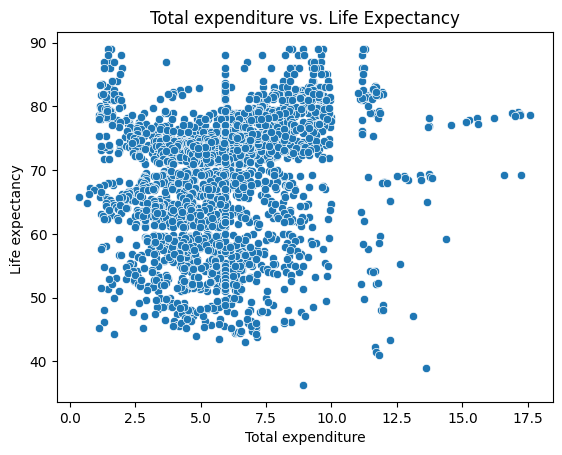

In [ ]:
sns.scatterplot(data=df_select, x='Total expenditure', y='Life expectancy ')
plt.title('Total expenditure vs. Life Expectancy')

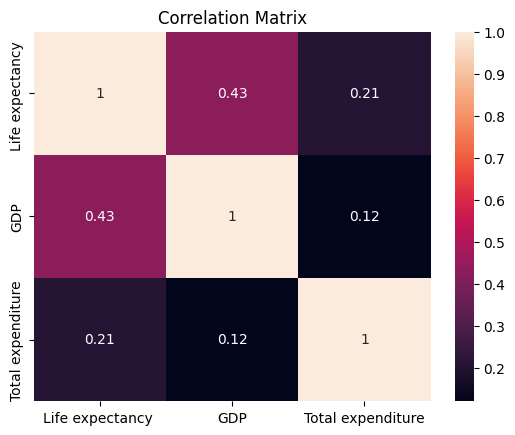

In [68]:
 correlation_matrices= df_select[['Life expectancy ', 'GDP', 'Total expenditure']].corr()
 sns.heatmap(correlation_matrices, annot=True)
 plt.title('Correlation Matrix')
 plt.show()

Predictive Analysis

In [ ]:
X = df_select[['Total expenditure']]
y = df_select['Life expectancy ']

In [ ]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = sk.linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_prediction = model.predict(X_test)

In [ ]:
r_squared =sk.metrics.r2_score(y_test, y_prediction)
print(f'R-squared: {r_squared}')

R-squared: 0.06592611341873733


In [ ]:
mean_squeare_error = sk.metrics.mean_squared_error(y_test, y_prediction)
print(f'Mean Squared Error: {mean_squeare_error}')

Mean Squared Error: 80.92374981595093


In [ ]:
selected_countries = ['South Africa', 'Zimbabwe']
select_countries = df[df_select['Country'].isin(selected_countries)]

In [ ]:
country_year_stats = select_countries.groupby(['Country', 'Year']).agg({'Life expectancy ': 'mean', 'Total expenditure': 'mean'}).reset_index()

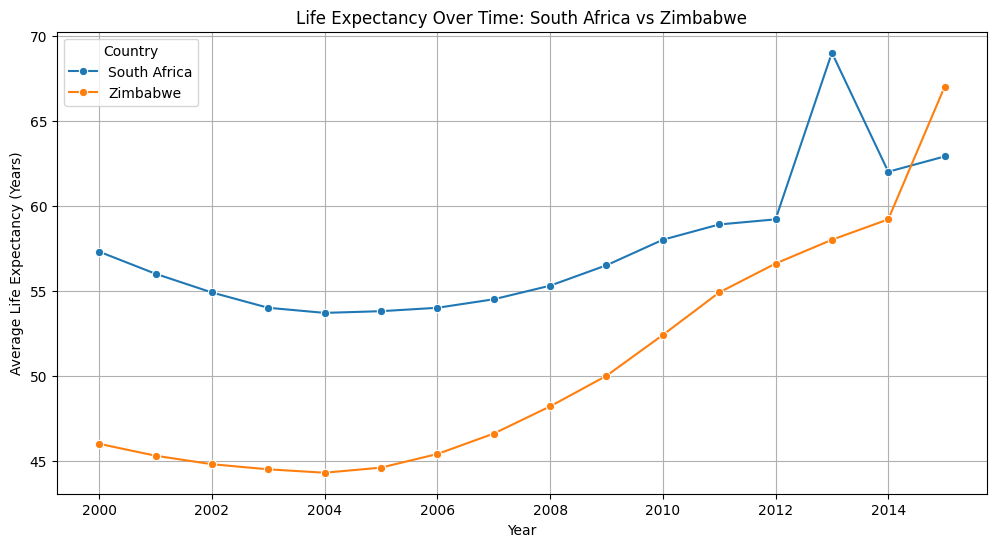

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=country_year_stats, x='Year', y='Life expectancy ', hue='Country', marker='o')
plt.title('Life Expectancy Over Time: South Africa vs Zimbabwe')
plt.ylabel('Average Life Expectancy (Years)')
plt.grid(True)
plt.show()